In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
X_de = np.array([1,1.5,2,2.5,0.5]).reshape(-1, 1)
X_gamma = np.array([0.1,0.15,0.2,0.25,0.3]).reshape(-1, 1)

In [ ]:
# Initializing column names
col = ['col_1','col_2','col_3', 'col_4','col_5','col_6','col_7','sk_real','sk_pred','nu_real','nu_pred']

# Getting the excel with data
df_noslip = pd.read_excel("/content/no_slip.xlsx",header=None)
df_noslip.columns = col

df_first = pd.read_excel("/content/first_order_slip.xlsx",header=None)
df_first.columns = col

df_second = pd.read_excel("/content/second_order_slip.xlsx",header=None)
df_second.columns = col

In [ ]:

Y_noslip_de_s = np.array(df_noslip['sk_real'][4:9]).reshape(-1, 1)
Y_first_de_s = np.array(df_first['sk_real'][4:9]).reshape(-1, 1)
Y_second_de_s = np.array(df_second['sk_real'][4:9]).reshape(-1, 1)

Y_noslip_gamma_s = np.array(df_noslip['sk_real'][23:28]).reshape(-1, 1)
Y_first_gamma_s = np.array(df_first['sk_real'][23:28]).reshape(-1, 1)
Y_second_gamma_s = np.array(df_second['sk_real'][23:28]).reshape(-1, 1)

In [ ]:
Y_noslip_de_n = np.array(df_noslip['nu_real'][4:9]).reshape(-1, 1)
Y_first_de_n = np.array(df_first['nu_real'][4:9]).reshape(-1, 1)
Y_second_de_n = np.array(df_second['nu_real'][4:9]).reshape(-1, 1)

Y_noslip_gamma_n = np.array(df_noslip['nu_real'][19:24]).reshape(-1, 1)#not fitting
Y_first_gamma_n = np.array(df_first['nu_real'][19:24]).reshape(-1, 1)#not fitting
Y_second_gamma_n = np.array(df_second['nu_real'][19:24]).reshape(-1, 1)#not fitting

## Gamma parameter

In [ ]:
# Plotting points and lines for different iterations
def plotting_new(X,y):

    plt.plot(X,y[0],'--',label='iter 20')
    plt.plot(X,y[1],'-.',label='iter 50')
    plt.plot(X,y[2],':',label='iter 100')
    plt.plot(X,y[3],'-',label='iter 200')
    plt.scatter(X, Y, color="r")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend(loc ="lower right");
    plt.show()

In [ ]:
# Function to perform Linear regression for different iterations and store value
# Then call plotter funtion
def Linear_regression(X, Y, alpha=0.1):
    y = []
    theta_0 = random.randint(1,100)*0.01
    theta_1 =  random.randint(1,100)*0.01
    iterations = [20,50,100,200]
    for iter in iterations :
        for _ in range(iter) :

            # m*1 matrix
            hypothesis = (theta_1*X) + theta_0

            # m*1 matrix
            cost_J =  hypothesis - Y

            # Value updation
            theta_0 -= alpha*(np.mean(cost_J))
            theta_1 -= alpha*(np.mean(cost_J*X))

        # Store the MSE for that iter
        mse = mean_squared_error(Y, hypothesis)
        y.append((theta_1*X) + theta_0)
    plotting_new(X,y)

In [ ]:
import random

## DE PARAMETER SKIN FRICTION (NO SLIP CONDITION)

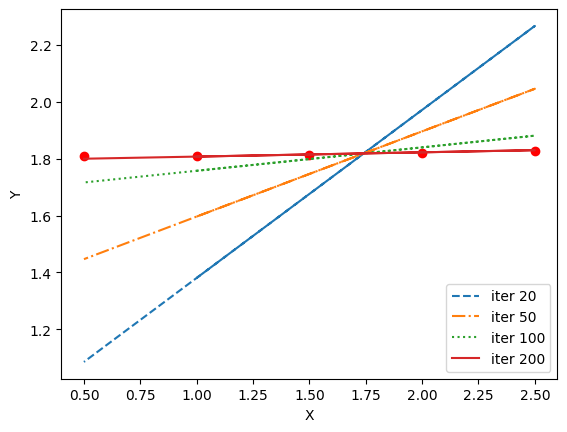

In [ ]:
alpha = 0.1
X = np.array(X_de)
Y = np.array(Y_noslip_de_s)
Linear_regression(X,Y)

## DE PARAMETER SKIN FRICTION (FIRST ORDER SLIP)

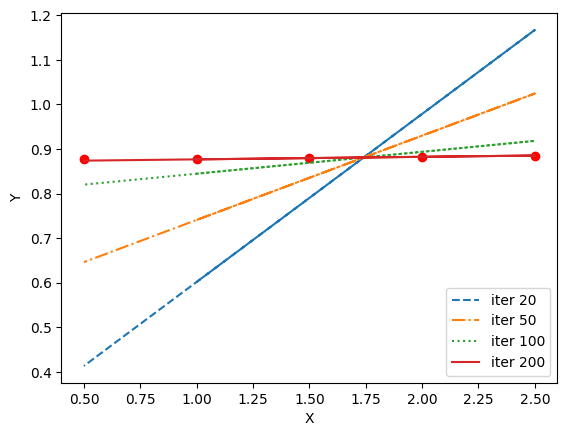

In [ ]:
alpha = 0.1
X = np.array(X_de)
Y = np.array(Y_first_de_s )
Linear_regression(X,Y)

## DE PARAMETER SKIN FRICTION (SECOND ORDER SLIP)

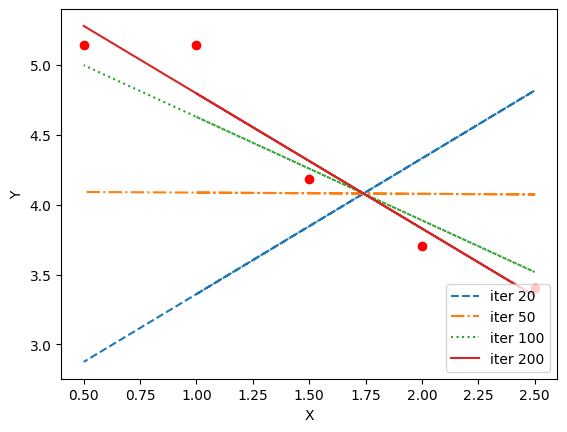

In [ ]:
alpha = 0.1
X = np.array(X_de)
Y = np.array(Y_second_de_s )
Linear_regression(X,Y)

## DE PARAMETER NUSSELT NUMBER (NO SLIP CONDITION):

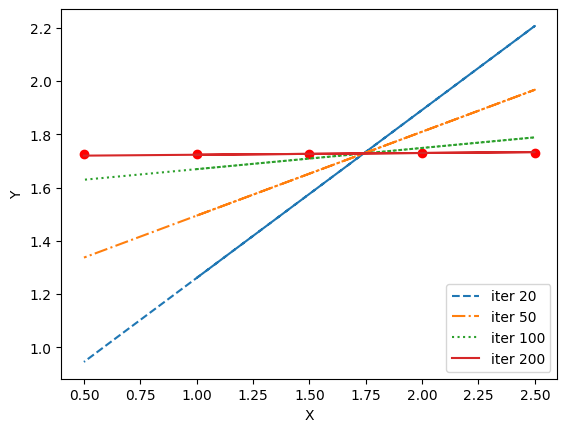

In [ ]:
alpha = 0.1
X = np.array(X_de)
Y = np.array(Y_noslip_de_n)
Linear_regression(X,Y)

## DE PARAMETER NUSSELT NUMBER (FIRST ORDER CONDITION):

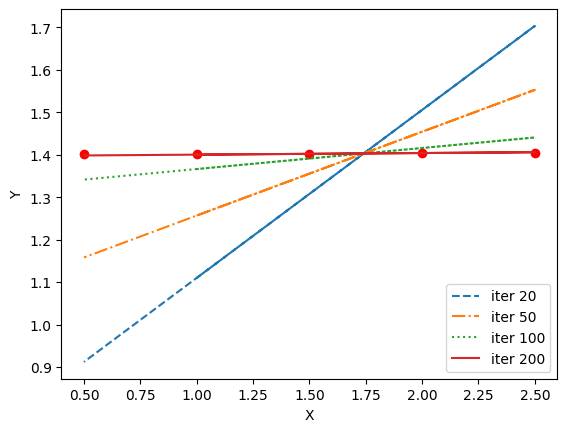

In [ ]:
alpha = 0.1
X = np.array(X_de)
Y = np.array(Y_first_de_n)
Linear_regression(X,Y)

## DE PARAMETER NUSSELT NUMBER (SECOND ORDER CONDITION):

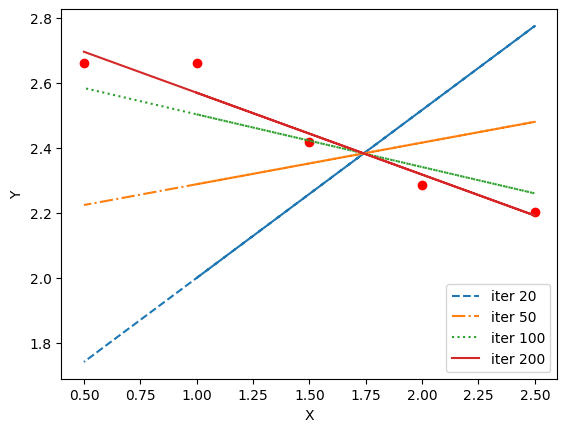

In [ ]:
alpha = 0.1
X = np.array(X_de)
Y = np.array(Y_second_de_n)
Linear_regression(X,Y)

## GAMMA PARAMETER SKIN FRICTION (NO SLIP CONDITION)

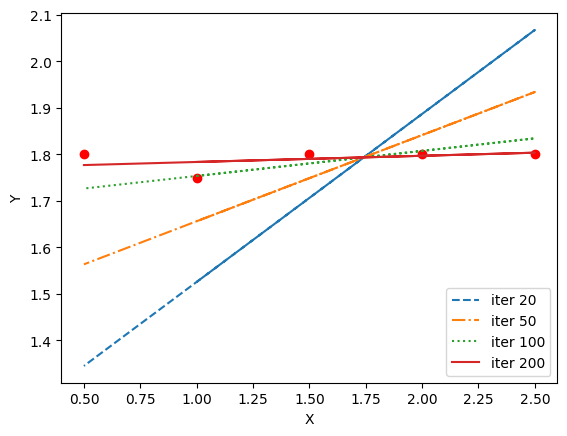

In [ ]:
alpha = 0.1
X = np.array(X_de)
Y = np.array(Y_noslip_gamma_s)
Linear_regression(X,Y)

## GAMMA PARAMETER SKIN FRICTION (FIRST ORDER SLIP)

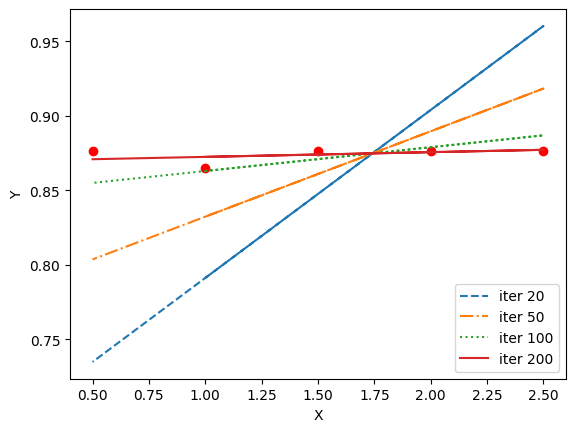

In [ ]:
alpha = 0.1
X = np.array(X_de)
Y = np.array(Y_first_gamma_s)
Linear_regression(X,Y)

## GAMMA PARAMETER SKIN FRICTION (SECOND ORDER SLIP)

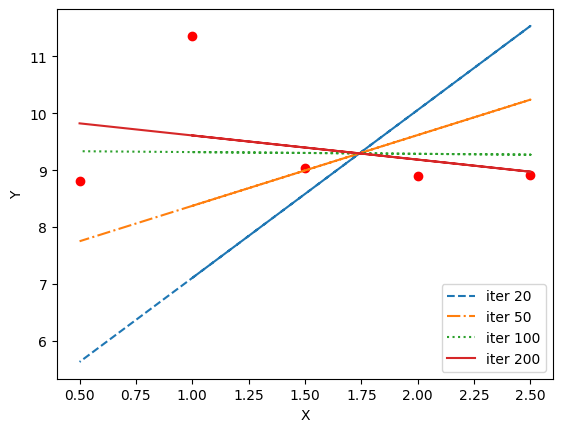

In [ ]:
alpha = 0.1
X = np.array(X_de)
Y = np.array(Y_second_gamma_s)
Linear_regression(X,Y)

## GAMMA PARAMETER NUSSELT NUMBER (NO SLIP)

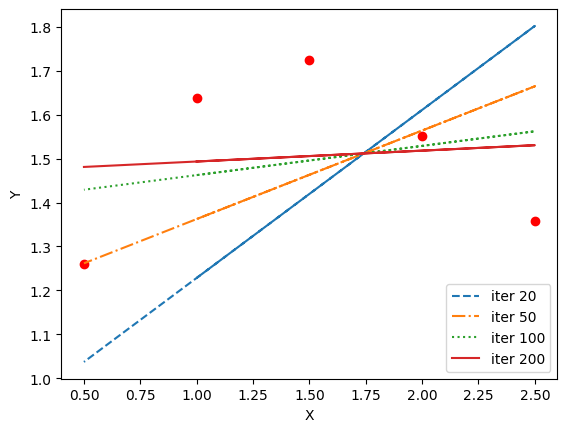

In [ ]:
alpha = 0.01
X = np.array(X_de)
Y = np.array(Y_noslip_gamma_n)
Linear_regression(X,Y)

## GAMMA PARAMETER NUSSELT NUMBER (FIRST ORDER)

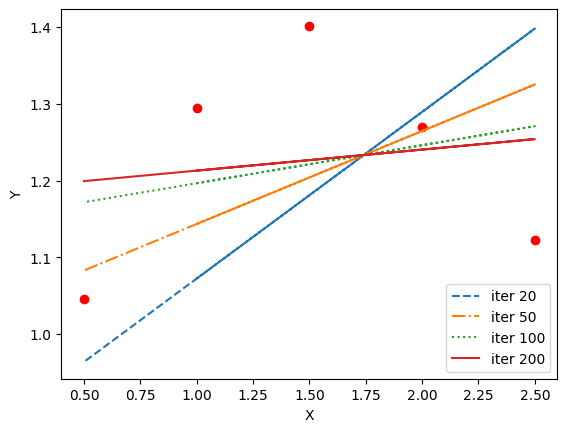

In [ ]:
alpha = 0.01
X = np.array(X_de)
Y = np.array(Y_first_gamma_n)
Linear_regression(X,Y)

## GAMMA PARAMETER NUSSELT NUMBER (SECOND ORDER)

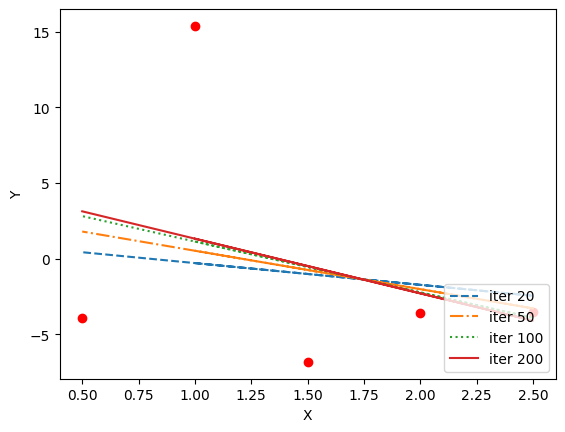

In [ ]:
alpha = 0.01
X = np.array(X_de)
Y = np.array(Y_second_gamma_n)
Linear_regression(X,Y)

In [ ]:
def plot_graph_mse(mse,name):
    x_axis = np.arange(5,200)
    lb = ['No slip','First order','Second order']
    line = [':','-.','--']
    for i in range(3) :
        y_axis = mse[i]
        plt.plot(x_axis,y_axis[5:],line[i],label=lb[i])
    plt.xlabel("epochs")
    plt.ylabel("mse("+name+")")
    plt.legend()
    plt.savefig(name+'.png', dpi = 1200)
    plt.show()

In [ ]:
def mse_graph(X,Y):
    EPOCH = 200
    alpha = 0.1
    theta_0 = 0.01
    theta_1 =  0.01
    mse = []
    for w in range(EPOCH) :
        # m*1 matrix
        hypothesis = (theta_1*X) + theta_0

        # m*1 matrix
        cost_J =  hypothesis - Y

        # Value updation
        theta_0 -= alpha*(np.mean(cost_J))
        theta_1 -= alpha*(np.mean(cost_J*X))
        mse.append(mean_squared_error(Y, hypothesis))

    return(mse)

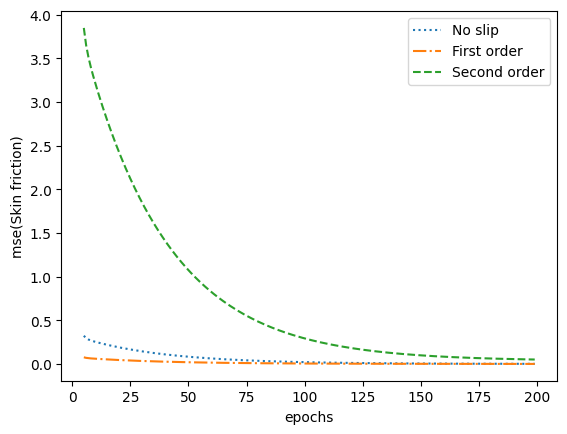

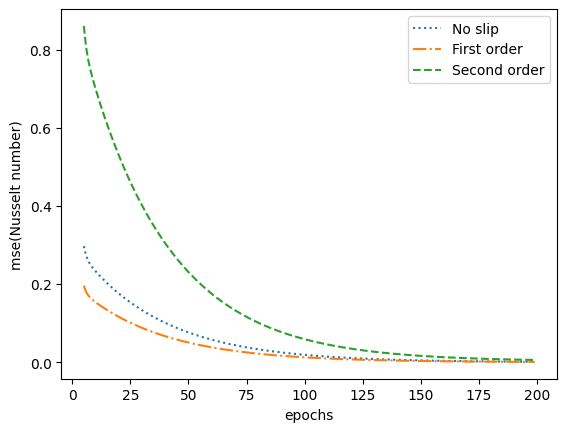

In [ ]:
X = np.array(X_de)
mse_all = []
for Y in [Y_noslip_de_s,Y_first_de_s,Y_second_de_s,Y_noslip_de_n,Y_first_de_n,Y_second_de_n]:
    mse_all.append(mse_graph(X,Y))

plot_graph_mse(mse_all[0:3],"Skin friction")
plot_graph_mse(mse_all[3:],"Nusselt number")